In [1]:
# Using Keras to create a simple NN
# Against the MNIST database

import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import keras.backend as K
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
nb_classes = 10

np.random.seed(42)
%matplotlib notebook

Using TensorFlow backend.


In [2]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

# Reshape arrays
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [4]:
def swish(x):
    return x*K.sigmoid(x)

def swish_250(x):
    return 1.25*x*K.sigmoid(x)

def swish_500(x):
    return 1.5*x*K.sigmoid(x)

def swish_750(x):
    return 1.75*x*K.sigmoid(x)

def swish_200(x):
    return 2*x*K.sigmoid(x)

In [5]:
activations = ["relu", swish, swish_250, swish_500, swish_750, swish_200] # e_swish_1, 
names = ["relu", "swish", "e_swish (1.25)", "e_swish (1.5)", "e_swish (1.75)", "e_swish (2)"]
print(names)

['relu', 'swish', 'e_swish (1.25)', 'e_swish (1.5)', 'e_swish (1.75)', 'e_swish (2)']


In [17]:
def create_models():
    models = []

    sgd = SGD(lr=0.1)
    # create models - ALCAIDES, SWISH, RELU, DIGMOID, TANH
    for act in activations:
        model1 = Sequential()
        model1.add(Dense(200, input_dim=784, activation=act))
        model1.add(Dropout(0.2))
        model1.add(Dense(100, activation=act))
        model1.add(Dropout(0.2))
        model1.add(Dense(60, activation=act))
        model1.add(Dropout(0.2))
        model1.add(Dense(30, activation=act))
        model1.add(Dropout(0.2))
        model1.add(Dense(10, activation='softmax'))
        models.append(model1)

    # Compile models
    for model in models:
        model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Create Accuracy history
    acc = []
    for model in models: acc.append([0])
        
    return models, acc

In [18]:
def test_against(models, epochs, acc):
    for i,model in enumerate(models):
        print("Training model {0}".format(i))
        his = model.fit(X_train, Y_train, epochs=epochs, batch_size=128,  verbose=1, validation_data=(X_test, Y_test))
        scores = his.history["val_acc"]
        acc[i] = scores
        print("///////////////////////////////////////////////")
        print("///////////////////////////////////////////////")

    return models, acc

# Plot the evolution of the accuracies
def plot_results(accs):
    plt.figure()
    plt.title("Test error for different activation functions on MNIST")
    plt.xlabel("Number of epochs")
    plt.ylabel("Test error (%)")
    plt.xticks(range(21))
    for i,acc in enumerate(accs):
        plt.plot(100-np.array(acc))
    plt.grid()
    plt.legend(names[0:], loc='upper right')
    plt.show()

In [14]:
kernels, acc = create_models()

In [15]:

kernels, acc = test_against(kernels, 20, acc)
# kernels_, acc = test_against(kernels_, 20, acc)

Training model 0
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.7968 - acc: 0.7421 - val_loss: 0.2309 - val_acc: 0.9321
Epoch 2/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.3280 - acc: 0.9080 - val_loss: 0.1674 - val_acc: 0.9490
Epoch 3/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.2466 - acc: 0.9336 - val_loss: 0.1350 - val_acc: 0.9602
Epoch 4/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.2014 - acc: 0.9450 - val_loss: 0.1293 - val_acc: 0.9618
Epoch 5/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.1735 - acc: 0.9530 - val_loss: 0.1077 - val_acc: 0.9689
Epoch 6/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.1531 - acc: 0.9592 - val_loss: 0.0944 - val_acc: 0.9724
Epoch 7/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.1417 - acc: 0.9625 - val_loss:

Epoch 18/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.0787 - acc: 0.9762 - val_loss: 0.0679 - val_acc: 0.9808
Epoch 19/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.0767 - acc: 0.9770 - val_loss: 0.0696 - val_acc: 0.9798
Epoch 20/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.0724 - acc: 0.9783 - val_loss: 0.0699 - val_acc: 0.9800
///////////////////////////////////////////////
///////////////////////////////////////////////
Training model 3
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.5843 - acc: 0.8212 - val_loss: 0.2288 - val_acc: 0.9317
Epoch 2/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.2928 - acc: 0.9155 - val_loss: 0.1678 - val_acc: 0.9478
Epoch 3/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.2281 - acc: 0.9330 - val_loss: 0.1294 - val_acc: 0.9605
Epoch 4/20
6

60000/60000 [==============================] - 2s 25us/step - loss: 0.0855 - acc: 0.9749 - val_loss: 0.0709 - val_acc: 0.9789
Epoch 15/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.0785 - acc: 0.9767 - val_loss: 0.0706 - val_acc: 0.9800
Epoch 16/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0742 - acc: 0.9772 - val_loss: 0.0709 - val_acc: 0.9794
Epoch 17/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.0739 - acc: 0.9783 - val_loss: 0.0694 - val_acc: 0.9805
Epoch 18/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.0694 - acc: 0.9798 - val_loss: 0.0683 - val_acc: 0.9823
Epoch 19/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.0682 - acc: 0.9800 - val_loss: 0.0710 - val_acc: 0.9806
Epoch 20/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.0634 - acc: 0.9807 - val_loss: 0.0653 - val_acc: 0.9809
//////////////////////////////////////////////

<IPython.core.display.Javascript object>


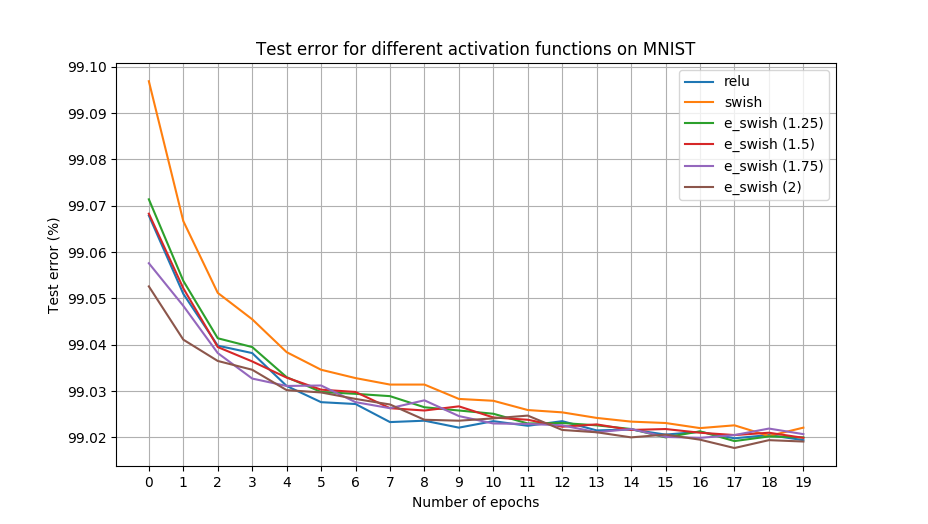

[[0.93210000000000004, 0.94899999999999995, 0.96020000000000005, 0.96179999999999999, 0.96889999999999998, 0.97240000000000004, 0.9728, 0.97670000000000001, 0.97640000000000005, 0.97789999999999999, 0.97650000000000003, 0.97750000000000004, 0.97650000000000003, 0.97850000000000004, 0.97829999999999995, 0.97940000000000005, 0.9788, 0.98019999999999996, 0.97950000000000004, 0.98060000000000003], [0.90310000000000001, 0.93330000000000002, 0.94879999999999998, 0.95450000000000002, 0.96160000000000001, 0.96540000000000004, 0.96719999999999995, 0.96860000000000002, 0.96860000000000002, 0.97170000000000001, 0.97209999999999996, 0.97409999999999997, 0.97460000000000002, 0.9758, 0.97660000000000002, 0.97689999999999999, 0.97799999999999998, 0.97740000000000005, 0.97970000000000002, 0.97789999999999999], [0.92859999999999998, 0.94620000000000004, 0.95860000000000001, 0.96050000000000002, 0.96699999999999997, 0.97019999999999995, 0.97060000000000002, 0.97109999999999996, 0.97350000000000003, 0.97

In [19]:
plot_results(acc)
print(acc)